# Librerias

In [52]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np
import nltk
import re
import math
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy
import array
import json
import sys
import os
import csv
import re
!pip install python-dotenv
from dotenv import load_dotenv

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install -q wordcloud
import wordcloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Api de Twitter

In [53]:
import tweepy
import json
import time
import pandas as pd
from datetime import date, datetime
import os
import csv
consumer_key ="ype6dn46KI5nYKWI2V0P3DI8N"    
consumer_secret ="qCm8tmjQOKd7cRlr4qmZM3KF7TuIl6Go1fR7woo5ul3CxsfbaJ"
access_token ="1328079922670219266-TpyXnnIjbuOvIYhBppGa9XRWJ7dFxB"
access_token_secret ="XsbcwdXRCASKhYPriYYyXGiDyYllRkvwf9gHJkzzJ1Gkl"

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api= tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)   

#Trends de un determinado país
def TopTrends(woeid):
    a = []
    trends = api.trends_place(id = woeid)
    for value in trends:
        for trend in value['trends']:
            a.append(trend['name'])
    return a

#Obtener tweets de un determinado trend o tema
def Getting_Tweets(consulta,count):
    date_since=2010-20-16#DESDE ESTA FECHA
    return tweepy.Cursor(api.search, q=consulta, lang="es",
                           since=date_since, tweet_mode='extended').items(count)
def deEmojify(text):
    regrex_pattern = re.compile(pattern="["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                "]+", flags=re.UNICODE)
    return regrex_pattern.sub(r'', text)

## Creación de corpus para cada trend en Perú

In [81]:
#========= MODULOS =================
#JUNTA UN ARRAY DE STRING'S EN UN SOLO STRING
def juntar(arr):
    text=''
    for x in range(0,len(arr)):
        text=text+arr[x]
    return text

def hacer_corpus(tweets):
    corpus = []
    for i in range(0, len(tweets)):
        #eliminamos los links y hasgtags
        tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                        if 'http' not in word and '@' not in word and '#' not in word])
        #definimos caracteres que pueden leer
        title = re.sub('[^a-zA-ZáéíóúñÁÉÍÓÚ]', ' ', tweets['text'][i])
        #transformamos las mayusculas en minusculas
        title = title.lower()
        #generamos los arreglos respectivos para los tweets con los carcteres aceptados
        title = title.split()
        #print(title)
        #eliminamos aquellas palabras que esten en el stopwords del español
        title = [word for word in title if (not word in stopwords.words('spanish') and word != "rt")]
        #volvemos a crear el corpus con las palabras aceptadas
        title = ' '.join(title) + " "
        corpus.append(title)
    return corpus

In [50]:
#recuperando los trends de Perú (418440)
Trend=TopTrends(418440)
print(Trend)

['Cuba', 'Egipto', 'LISA SOLO SOON', '#SOSPeru', '#SWITCH_ON', '#CuartoPoder', 'Fidel', 'SWITCH ON IS COMING', '#integracionsidera', 'EEUU', '#블랙핑크', 'Rodríguez Monteza', 'Betssy Chávez', 'Italia', 'Monteagudo', 'Gutiérrez', 'Bloqueo', 'Bruce', 'Bucks', 'Comunismo', 'La Habana', 'Estados Unidos', 'Canel', 'Miguel Díaz', 'URSS', 'jeon jungkook', 'chanyeol', 'Abajo', 'Tacna', 'Sebastián Salazar', 'China', 'Latinoamérica', 'Inglaterra', 'Voten', 'DDHH', 'Constituyente', 'Comunista', 'Azul', 'Chile', 'Cerrón', 'Lenin', 'iPhone', 'Verde', 'Castrista', 'federico salazar', 'Castillo', 'Changbin', 'Fujimori', 'Lima', 'TOMMY']


============================================================

# Creando archivos .csv para cada tendencia en Perú

In [56]:
Trend = ['Cuba', 'Egipto', 'LISA SOLO SOON', '#SOSPeru', '#SWITCH_ON', '#CuartoPoder', 
         'Fidel', 'SWITCH ON IS COMING', '#integracionsidera', 'EEUU', '#블랙핑크', 'Rodríguez Monteza', 
         'Betssy Chávez', 'Italia', 'Monteagudo', 'Gutiérrez', 'Bloqueo', 'Bruce', 'Bucks', 'Comunismo', 
         'La Habana', 'Estados Unidos', 'Canel', 'Miguel Díaz', 'URSS', 'jeon jungkook', 'chanyeol', 'Abajo', 
         'Tacna', 'Sebastián Salazar', 'China', 'Latinoamérica', 'Inglaterra', 'Voten', 'DDHH', 'Constituyente', 
         'Comunista', 'Azul', 'Chile', 'Cerrón', 'Lenin', 'iPhone', 'Verde', 
         'Castrista', 'federico salazar', 'Castillo', 'Changbin', 'Fujimori', 'Lima', 'TOMMY']
#Trend=TopTrends(418440)#recuperando los trends
select=1
for i in Trend:
    for j in range(0,len(Trend)):
        if(select-1==j):
            print("Procesando...", Trend[j], end="\n")
            data=Getting_Tweets(Trend[j],1000)
            #creando de csv
            with open('%s.csv' % Trend[j], mode='a', encoding='utf-8', newline='') as csv_file:
                fieldnames = ['created_at', 'text','sad']
                writer = csv.DictWriter(csv_file, fieldnames)
                writer.writeheader()
                for tweetObject in data:
                    writer.writerow({'text': deEmojify(tweetObject.full_text),
                                    'created_at': tweetObject.created_at})
            print('DONE!')
    select=select+1
print("===============FINAL=============")

Procesando... Comunista
DONE!
Procesando... Azul
DONE!
Procesando... Chile


Rate limit reached. Sleeping for: 209


DONE!
Procesando... Cerrón
DONE!
Procesando... Lenin


Rate limit reached. Sleeping for: 855


DONE!
Procesando... iPhone
DONE!
Procesando... Verde
DONE!
===============FINAL=============


## 1.  Carga y procesado texto (data set)

In [82]:
#descarga de paquete de palabras para omitir
nltk.download('stopwords')
stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
Trend = ['Cuba', 'Egipto', 'LISA SOLO SOON', '#SOSPeru', '#SWITCH_ON', '#CuartoPoder', 
         'Fidel', 'SWITCH ON IS COMING', '#integracionsidera', 'EEUU', '#블랙핑크', 'Rodríguez Monteza', 
         'Betssy Chávez', 'Italia', 'Monteagudo', 'Gutiérrez', 'Bloqueo', 'Bruce', 'Bucks', 'Comunismo', 
         'La Habana', 'Estados Unidos', 'Canel', 'Miguel Díaz', 'URSS', 'Jeon Jungkook', 'chanyeol', 'Abajo', 
         'Tacna', 'Sebastián Salazar', 'China', 'Latinoamérica', 'Inglaterra', 'Voten', 'DDHH', 'Constituyente', 
         'Comunista', 'Azul', 'Chile', 'Cerrón', 'Lenin', 'iPhone', 'Verde', 
         'Castrista', 'federico salazar', 'Castillo', 'Changbin', 'Fujimori', 'Lima', 'TOMMY']
#Juntar los tweets de cada tendencia
tweets = []
#B = juntar(hacer_corpus(pd.read_csv(Trend[0] + '.csv')))
for k in range (0, len(Trend)):
  B = juntar(hacer_corpus(pd.read_csv(Trend[k] + '.csv')))
  tweets.append(B)
#print(tweets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [95]:
#Setup
pd.set_option("display.precision", 50)
# Cargamos dataset
dat = [
       ['A1', tweets[0]],
       ['A2', tweets[1]],
       ['A3', tweets[2]],
       ['A4', tweets[3]],
       ['A5', tweets[4]],
       ['A6', tweets[5]],
       ['A7', tweets[6]],
       ['A8', tweets[7]],
       ['A9', tweets[8]],
       ['A10', tweets[9]],
       ['A11', tweets[10]],
       ['A12', tweets[11]],
       ['A13', tweets[12]],
       ['A14', tweets[13]],
       ['A15', tweets[14]],
       ['A16', tweets[15]],
       ['A17', tweets[16]],
       ['A18', tweets[17]],
       ['A19', tweets[18]],
       ['A20', tweets[19]],
       ['A21', tweets[20]],
       ['A22', tweets[21]],
       ['A23', tweets[22]],
       ['A24', tweets[23]],
       ['A25', tweets[24]],
       ['A26', tweets[25]],
       ['A27', tweets[26]],
       ['A28', tweets[27]],
       ['A29', tweets[28]],
       ['A30', tweets[29]],
       ['A31', tweets[30]],
       ['A32', tweets[31]],
       ['A33', tweets[32]],
       ['A34', tweets[33]],
       ['A35', tweets[34]],
       ['A36', tweets[35]],
       ['A37', tweets[36]],
       ['A38', tweets[37]],
       ['A39', tweets[38]],
       ['A40', tweets[39]],
       ['A41', tweets[40]],
       ['A42', tweets[41]],
       ['A43', tweets[42]],
       ['A44', tweets[43]],
       ['A45', tweets[44]],
       ['A46', tweets[45]],
       ['A47', tweets[46]],
       ['A48', tweets[47]],
       ['A49', tweets[48]],
       ['A50', tweets[49]],
      ]
df_sentences = pd.DataFrame(dat, columns=['Etiqueta', 'Contenido'])

labels = df_sentences['Etiqueta']
print("Etiquetas:")
print(labels)

n_clusters = np.unique(labels).shape[0]
print("n_clusters:", n_clusters)

Etiquetas:
0      A1
1      A2
2      A3
3      A4
4      A5
5      A6
6      A7
7      A8
8      A9
9     A10
10    A11
11    A12
12    A13
13    A14
14    A15
15    A16
16    A17
17    A18
18    A19
19    A20
20    A21
21    A22
22    A23
23    A24
24    A25
25    A26
26    A27
27    A28
28    A29
29    A30
30    A31
31    A32
32    A33
33    A34
34    A35
35    A36
36    A37
37    A38
38    A39
39    A40
40    A41
41    A42
42    A43
43    A44
44    A45
45    A46
46    A47
47    A48
48    A49
49    A50
Name: Etiqueta, dtype: object
n_clusters: 50


=============================================================

## 2. Vectorizar texto en una matriz numérica

In [96]:
# Build tf-idf vectorizer and cosine similarity matrix
def build_vectorizer(sentences, vocab=None, min_df=0.0, max_df=1.0, ngram_range=(1,1)):   # for a 2-gram use: ngram_range=(1,2)
    '''
    Construya el vectorizador tf-idf:
     1. Construya el count_vectorizer a partir del data set de entrada.
     2. Transforme count_vectorizer en bolsa de palabras.
     3. Adapte la transformación a la bolsa de palabras.
    '''
    
    # Construimos count vectorizer
    count_vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, vocabulary=vocab, ngram_range=(1,1))  # stop_words='english, max_features=N_FEATURES 
    cvec = count_vectorizer.fit(sentences)

    # Obtener nombres de funciones
    feature_names = cvec.get_feature_names()

    # Obtener bolsa de palabras y analizar
    bag_of_words = cvec.transform(sentences)
    df_bag_of_words = pd.DataFrame(bag_of_words.todense(), columns=feature_names)
    
    # Transforma bag_of_words en matriz tf-idf
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(bag_of_words)

    # Encuentra las palabras más populares y los pesos más altos
    word_cnts = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()  # for each word in column, sum all row counts
    df_cnts = pd.DataFrame({'word': feature_names, 'count': word_cnts})
    df_cnts = df_cnts.sort_values('count', ascending=False)

    # Cree pesos de palabras como una lista y ordénelos
    weights = np.asarray(tfidf.mean(axis=0)).ravel().tolist()
    df_weights = pd.DataFrame({'word': feature_names, 'weight': weights})
    df_weights = df_weights.sort_values('weight', ascending=False)

    df_weights = df_weights.merge(df_cnts, on='word', how='left')
    df_weights = df_weights[['word', 'count', 'weight']]

    # Similitud de oraciones
    cos_sim = cosine_similarity(tfidf, tfidf)

    # Matriz de distancia de oraciones
    samp_dist = 1 - cos_sim

    return cvec, feature_names, df_bag_of_words, tfidf, df_weights, cos_sim, samp_dist
  
# Construccion
sentences = df_sentences['Contenido'].values.tolist()
cvec, feature_names, df_bag_of_words, tfidf, df_weights, cos_sim, samp_dist = build_vectorizer(sentences)

df_tfidf = pd.DataFrame(tfidf.todense(), columns=feature_names)

#print("%d data set:" % len(sentences))
#print(sentences)
#print("---")
#print("%d numero de palabras (cada palabra)" % len(feature_names))
#print(feature_names)
#print("---")
#print("df_tfidf[%d,%d]:" % (len(sentences), len(feature_names)))
#print(df_tfidf.to_string())
#print("---")
#print("df_weights:")
#print(df_weights)

## 3. Bag-of-words

In [97]:
print("df_bag_of_words[%d,%d]:" % (len(sentences), len(feature_names)))
print(df_bag_of_words)

df_bag_of_words[50,30228]:
    ___  ______  ________________________________  ...  únicos  útil  útiles
0     0       0                                 0  ...       1     0       0
1     0       0                                 0  ...       0     1       0
2     0       0                                 0  ...       0     0       0
3     0       0                                 0  ...       0     0       0
4     0       0                                 0  ...       0     0       0
5     0       0                                 0  ...       0     0       0
6     0       0                                 0  ...       0     0       0
7     0       0                                 0  ...       1     0       0
8     0       0                                 0  ...       0     0       0
9     0       0                                 0  ...       0     0       1
10    0       0                                 0  ...       0     0       0
11    0       0                                 0

##4. Construccion de una nube de palabras a partir de las palabras ponderadas

In [87]:
#Promedios - palabra - n-veces - peso
print(df_weights)
#creacion de nube
s_word_freq = pd.Series(df_weights['count'])
s_word_freq.index = df_weights['word']
di_word_freq = s_word_freq.to_dict()

               word  count      weight
0              cuba  10435  1.2153e-01
1                si   4181  3.9763e-02
2         dictadura   2567  3.5858e-02
3            pueblo   2391  3.4769e-02
4         comunismo   1888  3.4442e-02
...             ...    ...         ...
30223    desbaratar      1  1.0802e-05
30224      reunirse      1  1.0802e-05
30225     golpeadas      1  1.0802e-05
30226         cuzco      1  1.0802e-05
30227  ciuuuuuuudad      1  1.0802e-05

[30228 rows x 3 columns]


In [88]:
#Impresion de frecuencias de palabras
print("Frecuencia de palabras:")
for k,v in di_word_freq.items():
  print(k,v)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
inspiracion 1
sapnap 1
conway 1
integrar 1
clingytwt 1
cocorrón 1
sapanap 1
jdfhksjdjfh 1
shroud 1
panameños 1
cúspide 1
cumplable 1
stalkearme 1
shop 1
santarosa 1
indiscutiblemente 1
choli 1
sheena 1
conurbano 1
córtala 1
papagiorgio 1
indiscutible 1
saturno 1
jasj 1
intentar 1
satriani 1
controversia 1
jajsjsjsjsj 1
institu 1
jajsksksk 1
chocolatada 1
colaborativo 1
pandemica 1
shannon 1
sb 1
colangiocarcinoma 1
clothes 1
shadyside 1
jazz 1
intereso 1
sanz 1
internautas 1
conspirativa 1
deeeenso 1
iommi 1
jajaaa 1
clingyduoooooooo 1
cortavenas 1
inocencio 1
italiaaaaaaaa 1
congrast 1
parpadeó 1
perdonadme 1
jezz 1
sanador 1
singan 1
declararía 1
its 1
conmovida 1
pelin 1
salseito 1
correctitos 1
corramos 1
selfie 1
selectividad 1
ck 1
claaaro 1
davis 1
corporativo 1
croquetas 1
sinéad 1
jefferson 1
subscribíos 1
siuuuu 1
jesu 1
skater 1
slips 1
couldn 1
invoquen 1
subite 1
smart 1
sobbing 1
pegadito 1
conciertos 1
ir

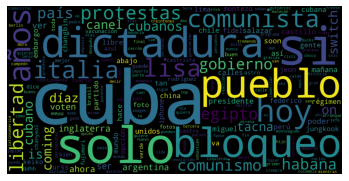

In [90]:
#Impresion de la nube de palabras
cloud = wordcloud.WordCloud(width=2000, height=1000).generate_from_frequencies(di_word_freq)
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Nube extraída con 10 tweets por trend

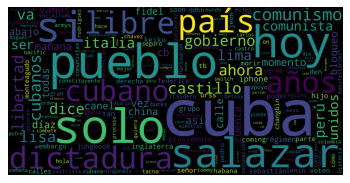